<a href="https://www.kaggle.com/code/astakalaswapnil/iris-dataset-classification-regression?scriptVersionId=101816585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Basic Imports

In [1]:
#______________________________________________________import libraries___________________________________________________#

import numpy as np # linear algebra
import pandas as pd # data processing
from scipy import optimize as op # Advanced optimization
import warnings 
warnings.filterwarnings('ignore') #ignore's warnings
from math import ceil 
import numpy as np
import math
import operator

#________________________________________________________Visualization___________________________________________________#

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score # Accuracy score
from sklearn.tree import DecisionTreeClassifier, plot_tree #Decision tree
from sklearn.svm import SVC

#____________________________________________________Spliting training and testing_______________________________________#

from sklearn.model_selection import train_test_split



# 2. Dataset Loading

In [2]:
# Loading the data

path = '../input/iris-flower-dataset/IRIS.csv'
df_iris = pd.read_csv(path, header=0)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df_iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
df_iris.isnull().values.any()


False

In [7]:
print('Iris-setosa')
setosa = df_iris['species'] == 'Iris-setosa'
print(df_iris[setosa].describe())
print('\nIris-versicolor')
versicolor = df_iris['species'] == 'Iris-versicolor'
print(df_iris[versicolor].describe())
print('\nIris-virginica')
virginica = df_iris['species'] == 'Iris-virginica'
print(df_iris[virginica].describe())

Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Iris-versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        

# 3. Visualisations

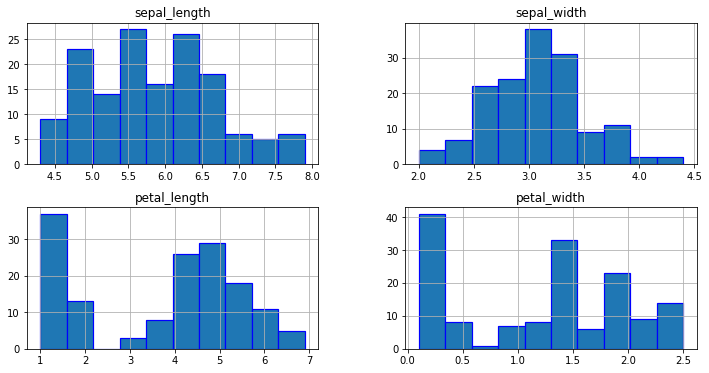

In [8]:
# The Histogram representation of the univariate plots for each measurement
np = df_iris
np.hist(edgecolor='blue', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


Text(0.5, 1.0, 'sepal Length VS width')

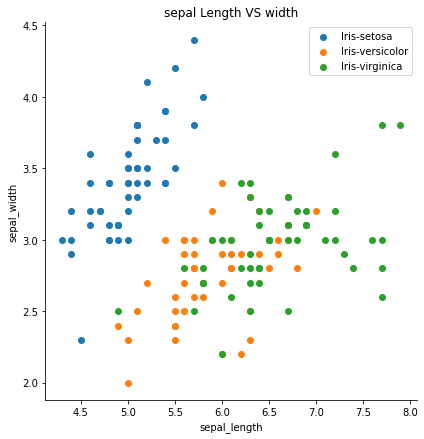

In [9]:
# Plotting scatter plot with respect to sepal length
sepalPlt = sb.FacetGrid(df_iris, hue="species", size=6).map(plt.scatter, "sepal_length", "sepal_width")
plt.legend(loc='upper right');
plt.title("sepal Length VS width")

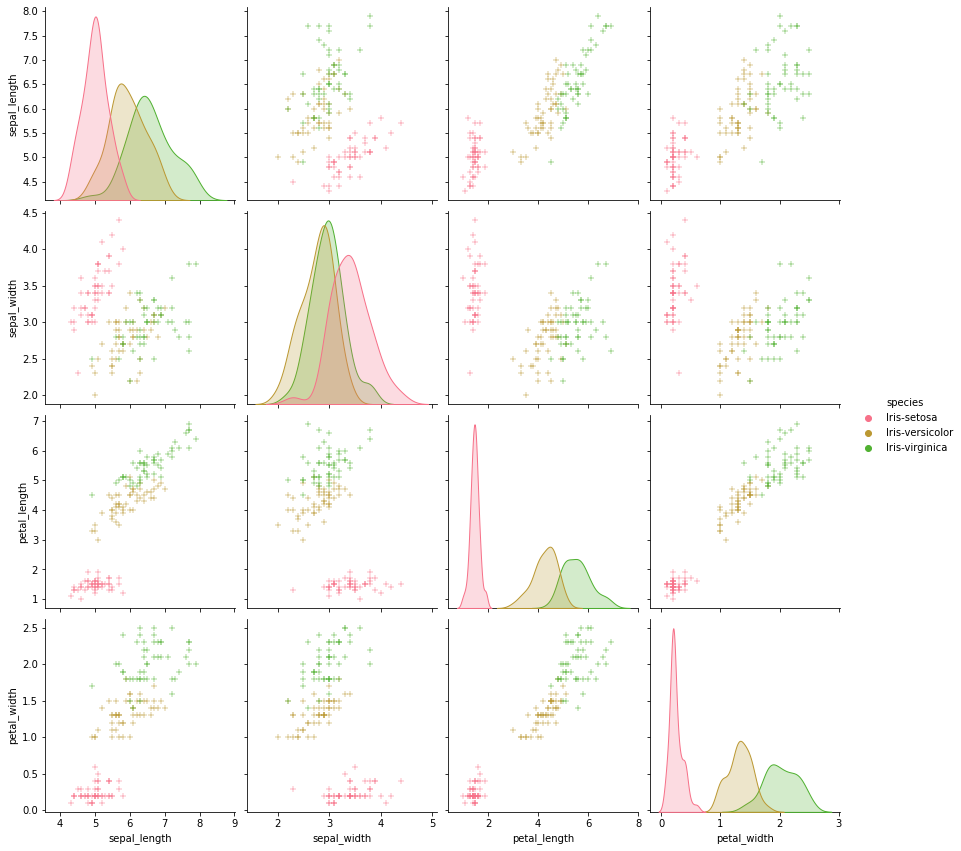

In [10]:
# Using seaborn pairplot to see the bivariate relation between each pair of features

import seaborn as sns
sns.set_palette('husl')

nl = df_iris
b = sns.pairplot(nl,hue="species", diag_kind="kde", markers='+',size =3);
plt.show()

In [11]:
# setting our data
import numpy as np
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# Number of examples
m = df_iris.shape[0]
# Features
n = 4
# Number of classes
k = 3

X = np.ones((m,n + 1))
y = np.array((m,1))
X[:,1] = df_iris['petal_length'].values
X[:,2] = df_iris['petal_width'].values
X[:,3] = df_iris['sepal_length'].values
X[:,4] = df_iris['sepal_width'].values

# Labels
y = df_iris['species'].values

# Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
# it shows 80% of data is split for training and 20% of the data goes to testing.

X = df_iris.drop(['species'], axis=1)
y = df_iris['species']
# print(X.head())
print(X_train.shape)
# print(y.head())
print(y_test.shape)

(120, 5)
(30,)


# 4. Regression

**Sigmoid function:**

* By using a link function, we can convert a logistic model to a predictor. For our model, we will be using the sigmoid function. The bellow images show the S-curve and the Sigmoid function equation.


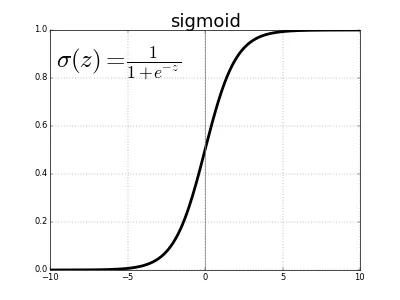


* So, we can observe the change from zero to one where zero is the least probability which is false and the one is about true case. So, the values that are right to the curve are true cases.


**Cost function:**

* In cost function J(0) represents the optimization objective. The main aim of cost function is to minimize the cost with this we can develop accurate model with very high error less percentage. 

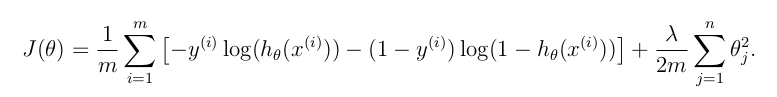


** Gradient function:**

* Gradient function helps in reducing the cost value of the items. It is the partial derivative of regularized cost gradient function, so it reduces the value

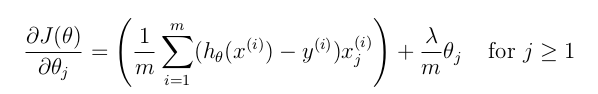







In [13]:
# Sigmoid function

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#_____________________________________________________Regularized cost function_________________________________________#

def reglrCostFunction(theta, X, y, lambda_s = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    reg = (lambda_s/(2 * m)) * np.sum(theta**2)
    J = J + reg
 
    return J
#_____________________________________________________Regularized gradient function____________________________________#

def reglrGradient(theta, X, y, lambda_s = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = lambda_s * theta /m
    gd = ((1 / m) * X.T.dot(h - y)) 
    gd = gd + reg

    return gd
#_________________________________________________Optimizing logistic regression (theta)_____________________________#

def logisticRegression(X, y, theta):
    result = op.minimize(fun = reglrCostFunction, x0 = theta, args = (X, y), method = 'TNC', jac = reglrGradient)
    
    return result.x

In [14]:
# Training
all_theta = np.zeros((k, n + 1))

# One vs all
i = 0
for flower in species:
    tmp_y = np.array(y_train == flower, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [15]:
# Predictions
Prob = sigmoid(X_test.dot(all_theta.T)) # probability for each flower
pred = [species[np.argmax(Prob[i, :])] for i in range(X_test.shape[0])]

print(" Test Accuracy ", accuracy_score(y_test, pred) * 100 , '%')

 Test Accuracy  96.66666666666667 %


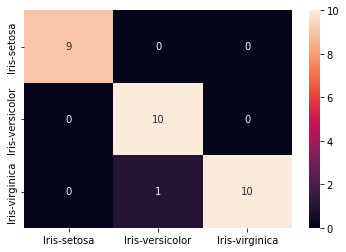

In [16]:
# Confusion Matrix
cnfm = confusion_matrix(y_test, pred, labels = species)

sb.heatmap(cnfm, annot = True, xticklabels = species, yticklabels = species);

In [17]:
# classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



* These can be determined by finding the distance between the two different points. Here we are determined this distance by “Euclidean Distance”.
* Euclidean Distance: “It is the distance between the two points in its own space (Euclidean Space)”.

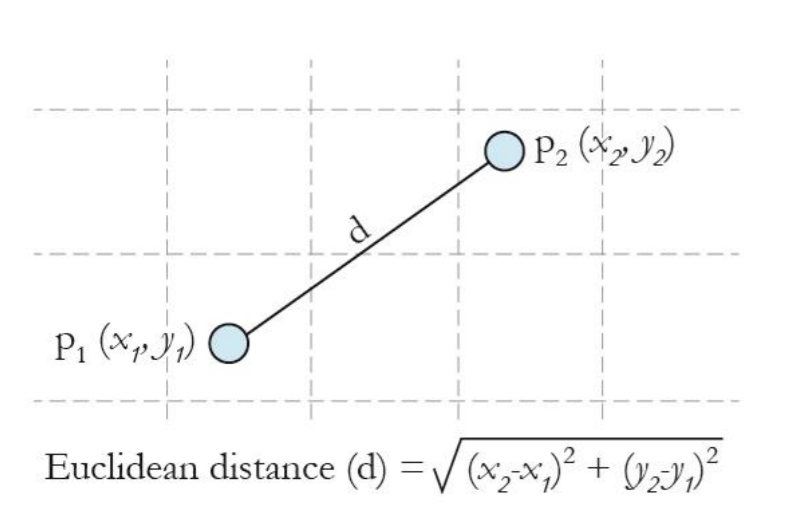

# 5. KNN Using Euclidian Distance.

In [18]:
#__________________________________________________KNN using Euclidian Distance______________________________________#

def euclidianDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
       
    return np.sqrt(distance)

In [19]:
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    for x in range(len(trainingSet)):
        
        dist = euclidianDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
      
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
   
 
    neighbors = []

   
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    classVotes = {}
    
  
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1


    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)

In [20]:
testSet = [[1.4, 3.6, 5.6, 1.2]]
test = pd.DataFrame(testSet)
result,neigh = knn(df_iris, test, 5)#here we gave k=4
print("And the flower is:",result)
print("the neighbors are:",neigh)

And the flower is: Iris-versicolor
the neighbors are: [106, 84, 59, 57, 90]


****K-Nearest Neighbour:

* It is very easy to implement and executes very quickly, but it also has some disadvantage I.e., it sometimes misses the shortest paths which can be easily pointed by us.
* Here we perform KNN Algorithm by different nearest neighbours

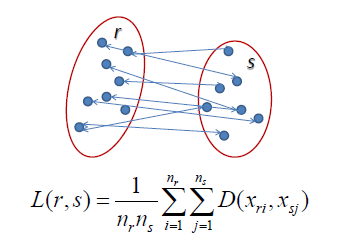


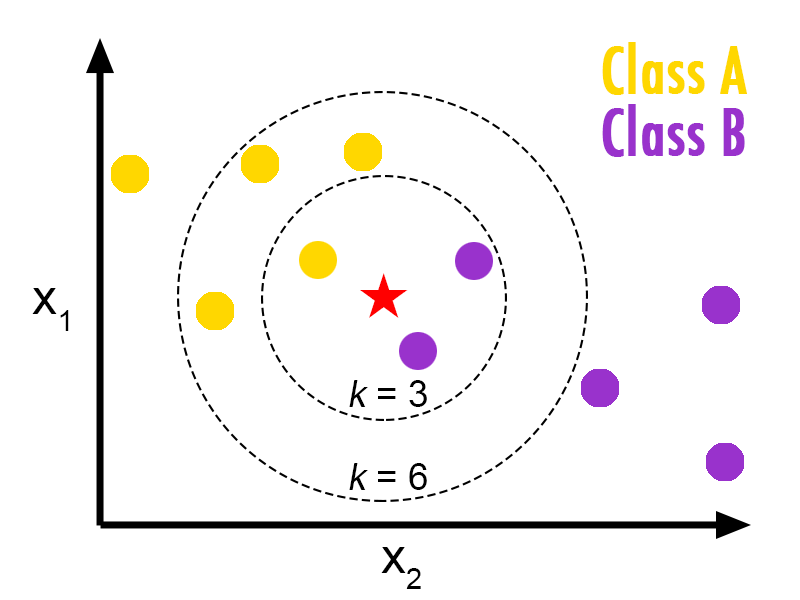

The above picture we can clearly visualize the three different cells that are compared with one point and by selecting different “K” values we can get different nearest neighbours as shown in figure: 



In [21]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [22]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]


****Classification Report for KNN:

On a per-class basis, the classification report shows a representation of the major classification metrics. This gives the classifier's actions a deeper insight into global accuracy. In terms of true and false positives and negatives, the metrics are described. In this case, positive and negative are common names for the classes of a problem with a binary classification. We will consider true and false occupied and true and false unoccupied in the example above. Therefore, when the real class is positive, as is the predicted class, a true positive is. A false positive is when it is negative for the real class, but positive for the predicted class. Metrics are described using this terminology as follows:

****Precision:

Precision is a classifier's ability not to mark a positive example that is negative. It is defined as the ratio of true positives to the sum of true and false positives for each class. "To be simple, what percent was right for all instances classified positive.

****Recall:

Recall is a classifier's ability to identify all positive instances. It is defined as the ratio of true positives to the sum of true positives and false negatives for each class. "To simplify, "What percent was categorized correctly for all instances that were actually positive.

****“F1” score:

A weighted harmonic mean of accuracy is the F1 value, noting that the best score is 1.0 and the worst is 0.0. As they integrate accuracy and recall into their computation, F1 scores are lower than precision scales. As a rule of thumb, the F1 weighted average should 
be used, not global precision, to compare classifier models.



In [23]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9333333333333333


# 6. Cross Validation using Brute Force.

In [24]:
#___________________________________________Cross validation using Brute Force_________________________________________#
from sklearn.model_selection import cross_val_score
cv_scores = []
neighbors = list(np.arange(3,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    
    cross_val = cross_val_score(knn,X_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(X_train,y_train)
pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))

The accuracy for optimal k = 5 using brute is 96.66666666666667


In [25]:
print("classification_report using brute force")
print(classification_report(y_test,pred))

classification_report using brute force
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



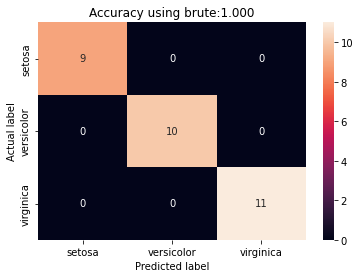

In [26]:

clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

****Support Vector Machine and Naive Bayes. 

* These two algorithms are performed by making use of the libraries(scikit learn). Because the only reason for these two algorithms is to check the results with different algorithms and also to learn about the library we had used (scikit learn). 

****Support Vector Machine:

* It is also known as “super vector network”. The main aim of these algorithm is to analyse the data for classification and regression. It was developed at AT&T lab. It is one of the most famous prediction methods based on statical learning framework. It does not only perform in linear classification but also perform in non-linear classification efficiently by using “kernel trick”.

****Naive Bayes:

* This algorithm mainly works by applying “Bayes Theorem” with independence assumptions. This algorithm is very high scalable in learning problem. It can also be called as simple bayes (or) independence bayes.

In [27]:
#__________________________________________________________________________________________________#
#____________Applying different Classification Models using "sklearn"______________________________#
#__________________________________________________________________________________________________#


# Seperating the data into dependent and independent variables

X = df_iris.iloc[:, :-1].values
y = df_iris.iloc[:, -1].values

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 7. Naive Bayes.

In [29]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [30]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [31]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9666666666666667


# 8. SVM

In [32]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [33]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [34]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


# 9. Decision Tree: 

* It is mainly used for classification of regression. In Decision Tree at every level, we need to rectify the splitting attribute.
* A Decision Tree is made up of diving the data set into sub data sets with homogenous values. Standard division is used to calculate the similarity of samples in data sets.
* We had loaded the trained and test data to scikit learn library for this algorithm and we had obtained 100% accuracy rate:

In [35]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [36]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [37]:
# Accuracy score

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


accuracy is 1.0


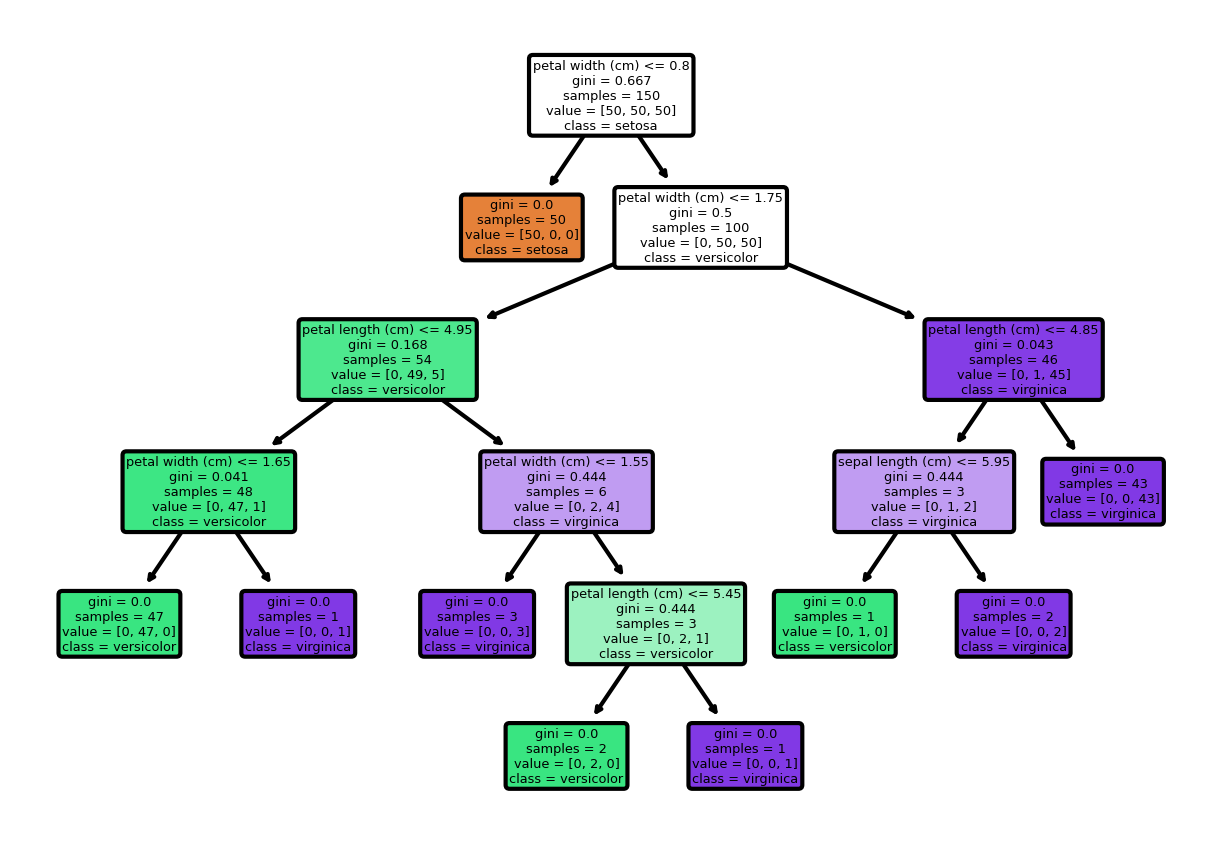

In [38]:
#Decision tree figure with analysis

from sklearn.datasets import load_iris
iris = load_iris()
plt.figure(figsize=(5, 3.5), dpi=300)
classifier = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(classifier, feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True)
plt.show()



**At every stage it shows five different aspects to clearly justify the further steps based 
on the present steps. Initially compares with the sepals and petals length and width. Here 
“gini” is the impurity level that plotted wrong (labelled wrong). Followed by samples count in 
a step. Value is the set with three different species and finally the class it belongs**

> ##**Thank you...! For Visiting,please upvote my page and encourage.**


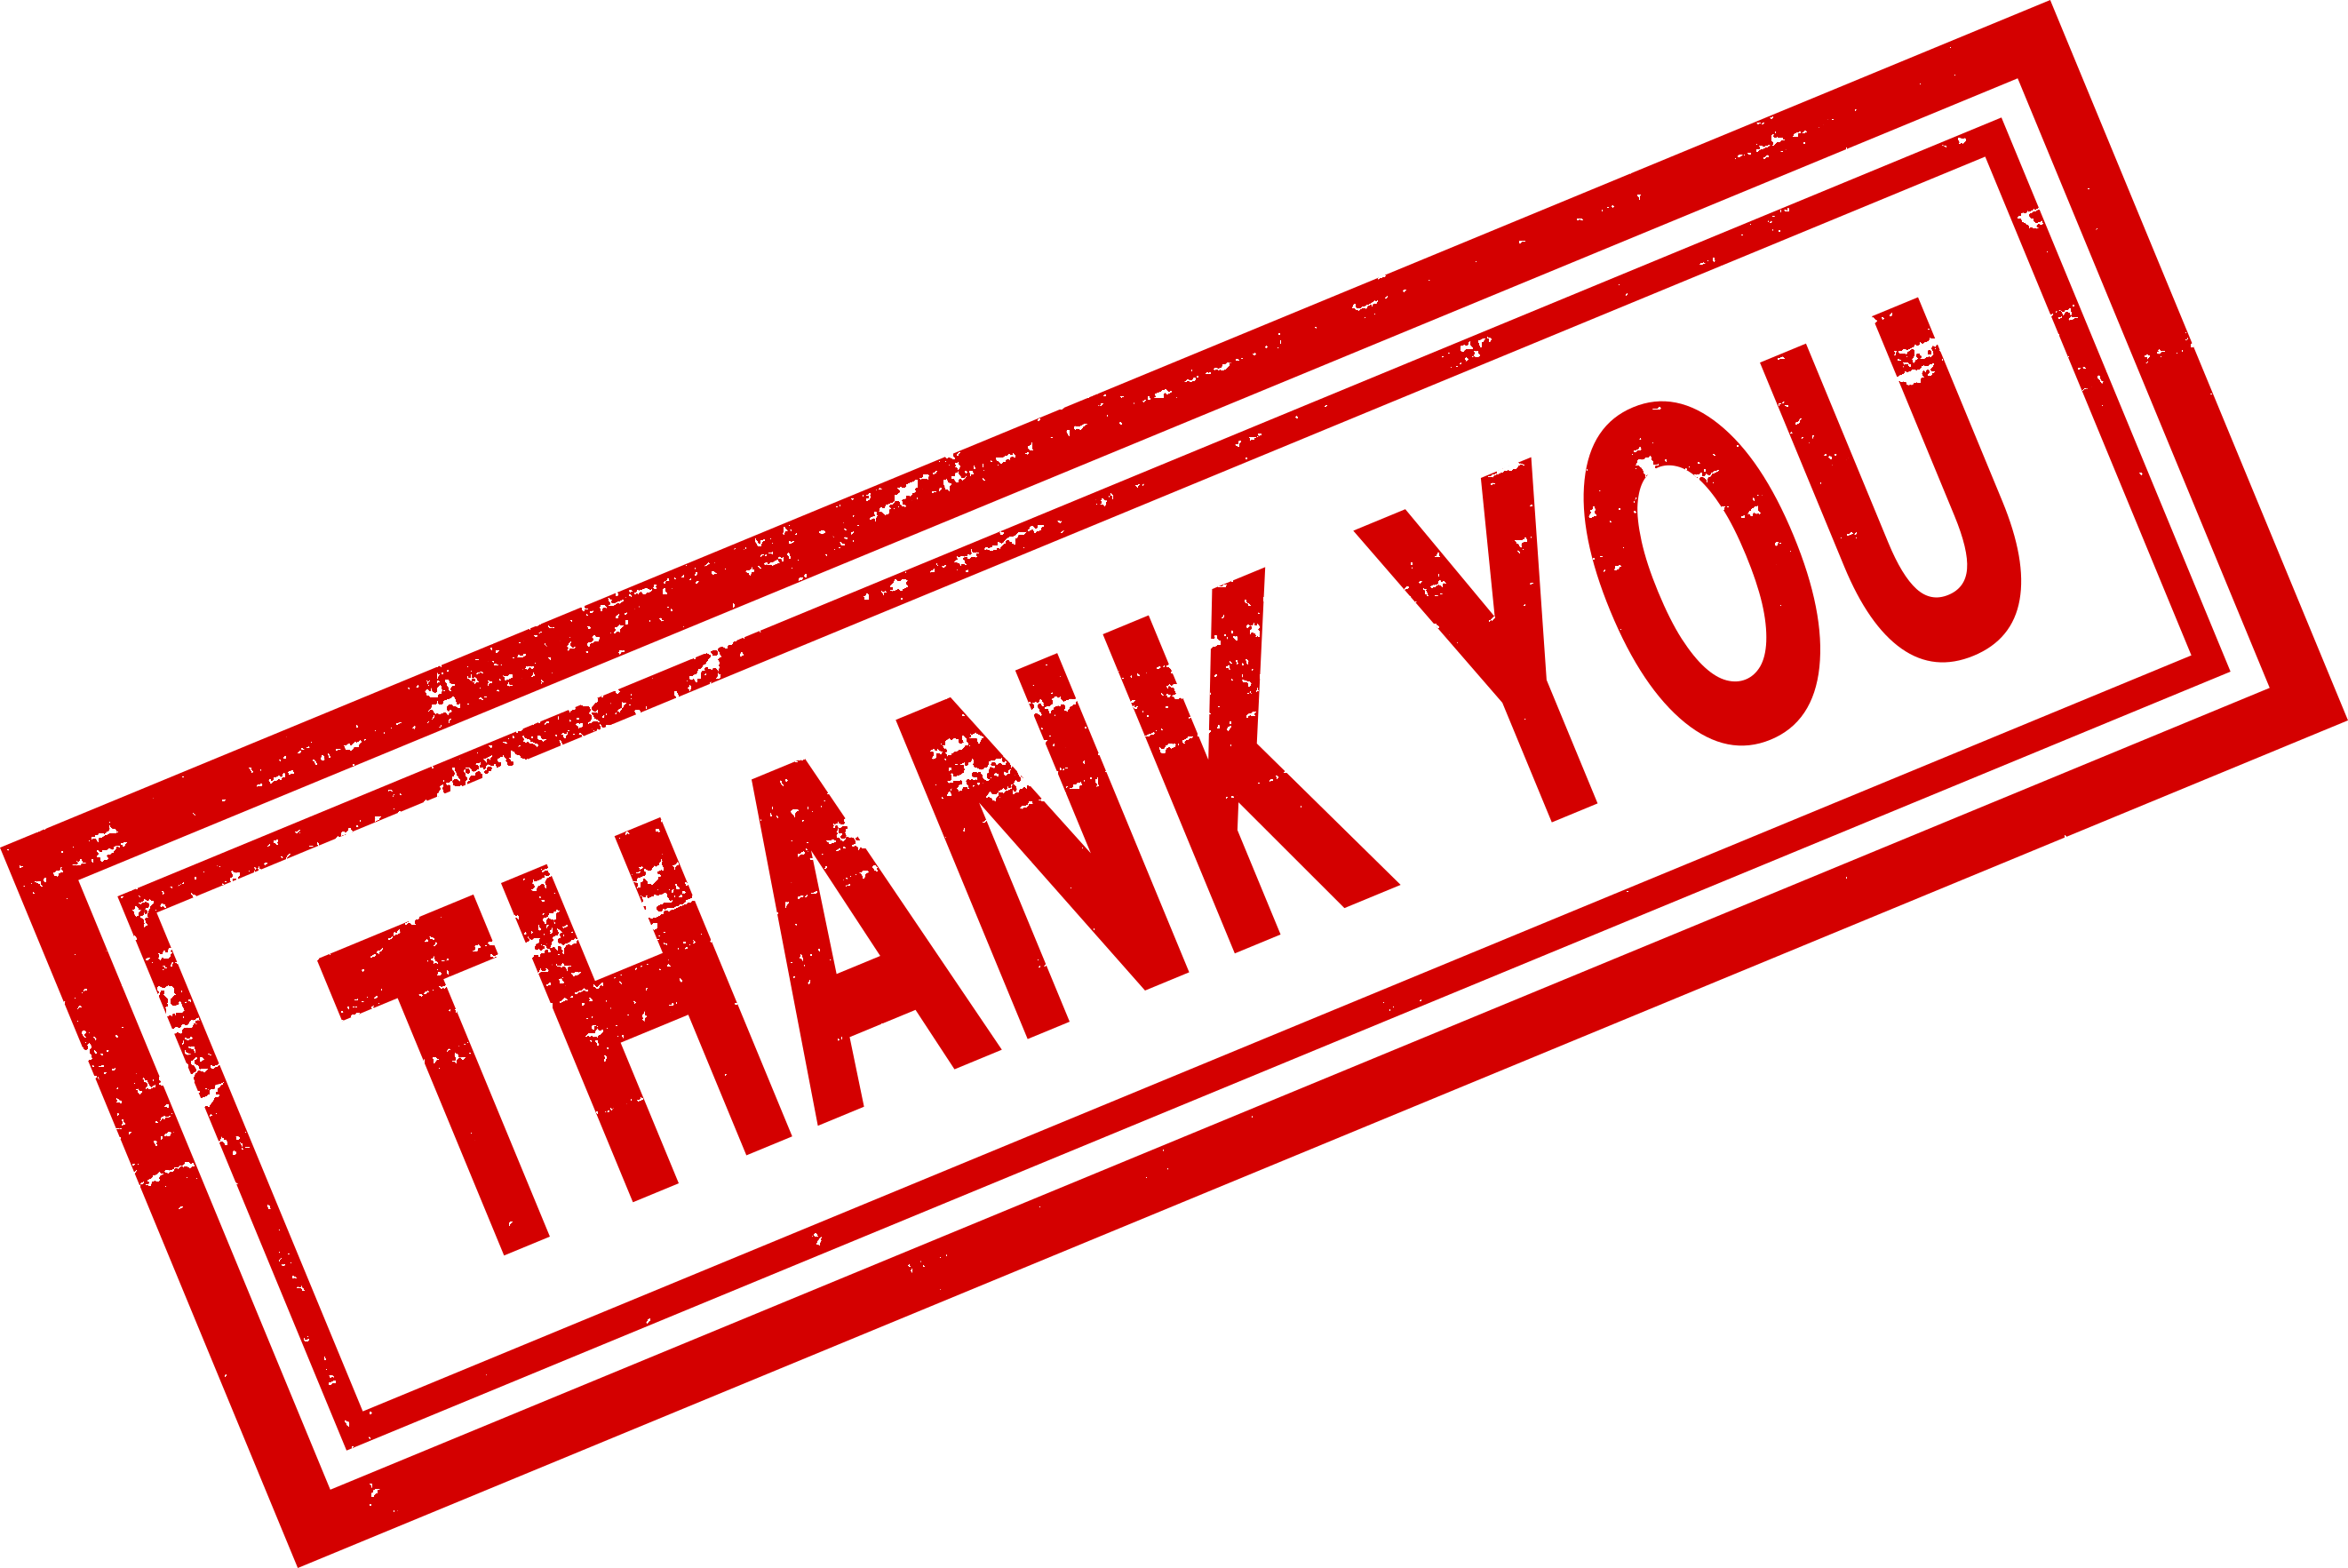